# 03 - MSM estimation and validation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mdshare
import pyemma

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=10), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

11-05-18 22:50:54 pyemma.coordinates.clustering.kmeans.KmeansClustering[0] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


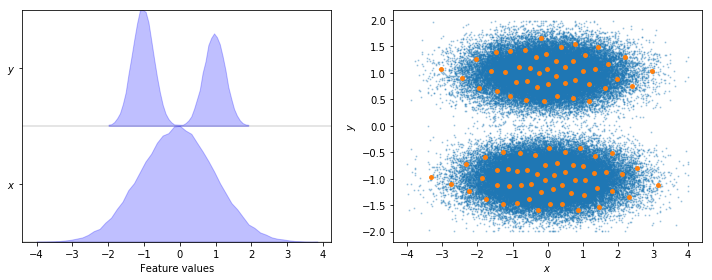

In [2]:
file = mdshare.fetch('hmm-doublewell-2d-100k.npz', working_directory='data')
with np.load(file) as fh:
    data = fh['trajectory']

cluster = pyemma.coordinates.cluster_kmeans(data, k=100)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(data, feature_labels=['$x$', '$y$'], ax=axes[0])
axes[1].scatter(*data.T, s=1, alpha=0.3)
axes[1].scatter(*cluster.clustercenters.T, s=15)
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
fig.tight_layout()

In [3]:
its = pyemma.msm.its(cluster.dtrajs, lags=[1, 2, 3, 5, 7, 10], nits=3, errors='bayes')

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=6), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

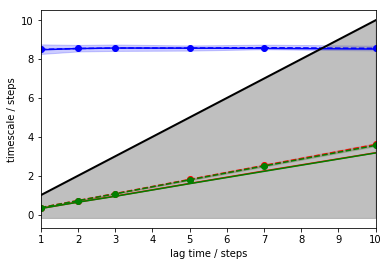

In [4]:
pyemma.plots.plot_implied_timescales(its, ylog=False)